# Homework 4

## Importing libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

## Functions

In [2]:
edges = []

In [3]:
def read_graph(path=''):
    global edges
    
    if not path:
        # dummy graph
        edges = [(1,2), (2,3), (3,4), (3,5), (4,5), (1,6), (2,6), (2,7), (7,8), (7,9), (8,9)]
        G = nx.Graph()
        G.add_edges_from(edges)
        return G
    else:
        if 'http' in path:
            import requests
            r = requests.get(path)
            edges = [tuple(list(map(int, line.strip().split(',')))[:2]) for line in r.text.split('\n') if line.strip()]
        else:
            file_path = path
            with open(file_path, 'r') as file:
                edges = [tuple(list(map(int, line.strip().split(',')))[:2]) for line in file if line.strip()]

        G = nx.Graph()
        G.add_edges_from(edges)

        return G

In [4]:
# Function that takes the labels from KMeans and plots the graph
def plotGraph(labels):
    global edges

    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, node_color=labels, with_labels=True)
    plt.show()

In [5]:
# Function to plot the elbow curve
def plotElbowCurve(eigenvalues):
    x = np.arange(1, len(eigenvalues) + 1)
    plt.plot(x, eigenvalues, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Eigenvalues')
    plt.title('Elbow curve')
    plt.show()

In [6]:
def kEigenvector(k=2):
    
    # Step 1: Construct the adjacency matrix A
    A = nx.adjacency_matrix(G).toarray()

    # Step 2: Define D to be the diagonal matrix and construct the Laplacian matrix L
    D = np.diag(A.sum(axis=1))
    D_inv_sqrt = np.diag(1 / np.sqrt(D.diagonal()))
    L = D_inv_sqrt @ A @ D_inv_sqrt
    
    # Step 3: Find the k largest eigenvectors of L
    eigenvalues, eigenvectors = eigh(L)

    plotElbowCurve(eigenvalues[::-1])

    # debug
    # eigenvectors_df = pd.DataFrame(eigenvectors)
    # print("Eigenvectors")
    # print(eigenvectors_df)
    # print('Eigenvalues', eigenvalues)

    X = eigenvectors[:, -k:] # eigevectors is a matrix (M, N) where M is the number of nodes and N is the number of eigenvectors
    # swap columns to get the largest eigenvectors first
    X = np.fliplr(X)
    # print("X", X)

    # debug
    # w, v = eigh(L, subset_by_index=[5, 5])
    # print("Largest eigenvector", v)

    # Step 4: Normalize the rows to have norm 1
    X = normalize(X, norm='l2', axis=1)

    # Step 5: Cluster the rows of X using k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    # print(labels)

    return labels, eigenvalues

# Dummy example

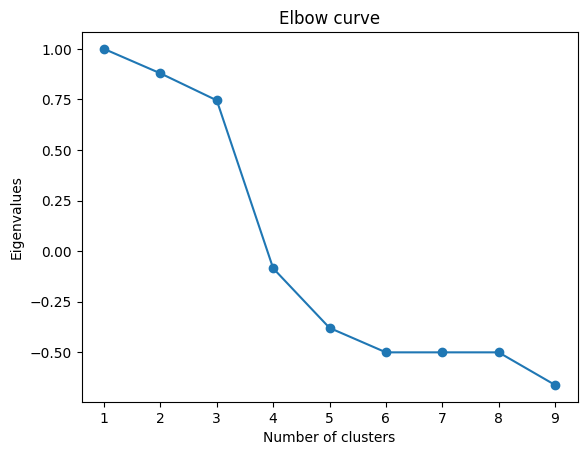

/Users/matteocirca/opt/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


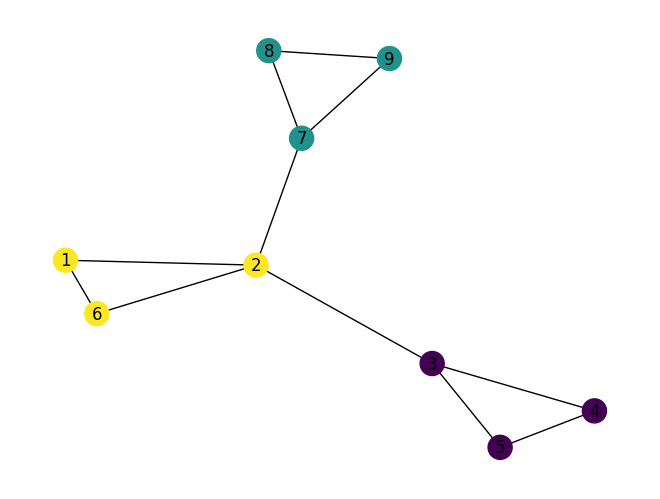

In [7]:
G = read_graph(path='')

labels, eigenvalues = kEigenvector(k=3)

plotGraph(labels)

# Example 1

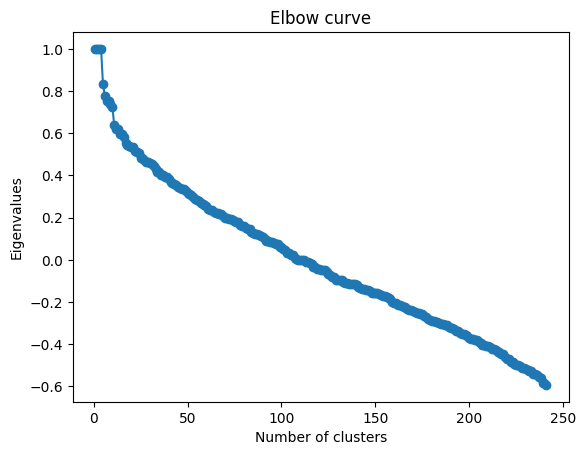

/Users/matteocirca/opt/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


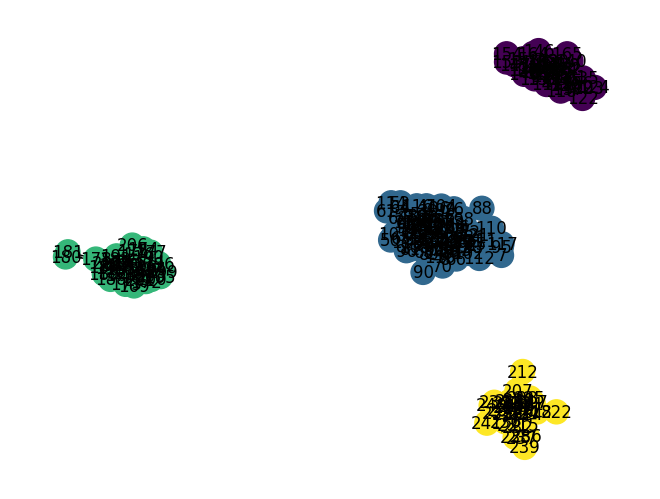

In [8]:
G = read_graph(path='https://raw.githubusercontent.com/matteocirca/data-mining-course-kth-2023/main/hw4/data/example1.dat')

labels, eigenvalues = kEigenvector(k=4)

plotGraph(labels)

# Example 2

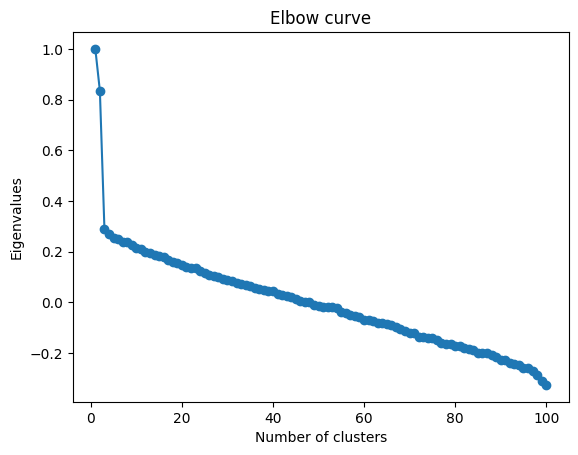

/Users/matteocirca/opt/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


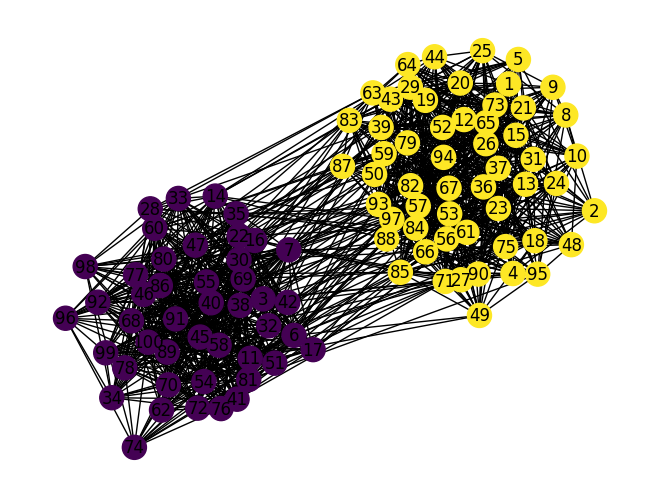

In [9]:
G = read_graph(path='https://raw.githubusercontent.com/matteocirca/data-mining-course-kth-2023/main/hw4/data/example2.dat')

labels, eigenvalues = kEigenvector(k=2)

plotGraph(labels)

## Observations

- The largest the k the more fine-grained the clustering is. For largest k-s we're cutting the hierarchical tree at a lower level, so we're getting more clusters.